In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy.random as ran
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics.scorer import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#!wget https://vincentarelbundock.github.io/Rdatasets/csv/datasets/USArrests.csv

In [3]:
data = pd.read_csv('USArrests.csv',delimiter=',')
#Z=data['Purchase'].copy()
llaves = list(data.keys())
#data
pca = PCA(n_components=4)
names = data[llaves.pop(0)]
Y = data[llaves]
scale = StandardScaler()
Y_t = scale.fit_transform(Y)
Y_pca = pca.fit(Y_t).transform(Y_t)
vectors = pca.components_.copy()
print(vectors)

[[ 0.53589947  0.58318363  0.27819087  0.54343209]
 [ 0.41818087  0.1879856  -0.87280619 -0.16731864]
 [-0.34123273 -0.26814843 -0.37801579  0.81777791]
 [ 0.6492278  -0.74340748  0.13387773  0.08902432]]


In [4]:
A = np.zeros(len(names))
B = np.zeros(len(names))
for i in range(len(A)):
    A[i] = np.dot(Y_t[i,:],vectors[0,:])
    B[i] = np.dot(Y_t[i,:],-vectors[1,:])

Text(0,0.5,'Second Principal Component')

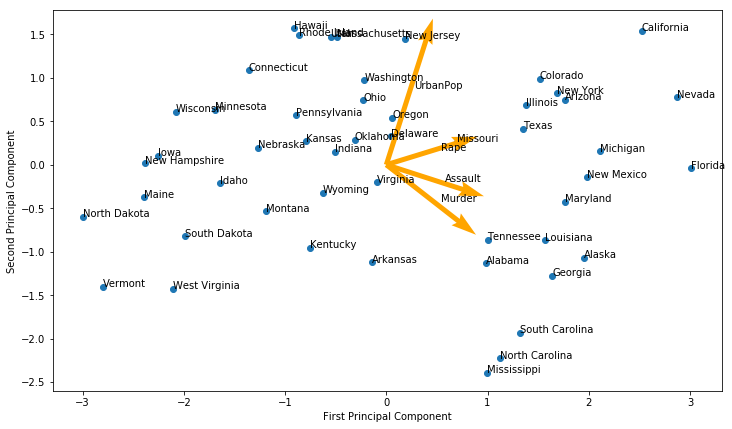

In [5]:
plt.figure(figsize=(12,(7)))
origin = [0], [0] # origin point
plt.scatter(A,B)
plt.quiver(*origin, vectors[0,:], -vectors[1,:], color=['orange','orange','orange','orange'], scale=4)
for name,xy in zip(names,zip(A, B)):
    plt.annotate(name, xy=xy, textcoords='data') # <--
for name,xy in zip(llaves,zip(vectors[0,:], -vectors[1,:])):
    plt.annotate(name, xy=xy, textcoords='data')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

(0, 1.03)

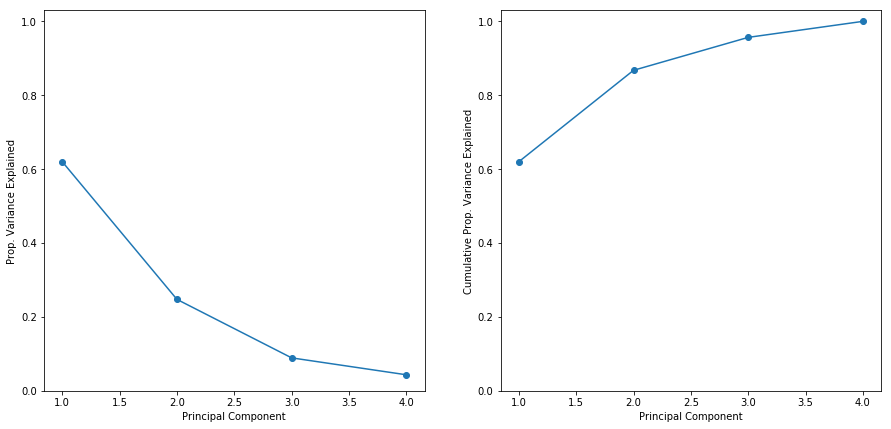

In [6]:
fig = plt.figure(figsize=(15,(7)))
ax = fig.add_subplot(121)
plt.scatter(np.arange(1,5),pca.explained_variance_ratio_)
plt.plot(np.arange(1,5),pca.explained_variance_ratio_)
plt.ylim(0,1.03)
plt.xlabel("Principal Component")
plt.ylabel("Prop. Variance Explained")
sumas = pca.explained_variance_ratio_.copy()
for i in range(1,len(sumas)):
    sumas[i] = pca.explained_variance_ratio_[0:i+1].sum()
ax = fig.add_subplot(122)
plt.scatter(np.arange(1,5),sumas)
plt.plot(np.arange(1,5),sumas)
plt.ylabel("Cumulative Prop. Variance Explained")
plt.xlabel("Principal Component")
plt.ylim(0,1.03)

Tercera parte

In [68]:
data = pd.read_csv('Cars93.csv',delimiter=',')
llaves = ['MPG.highway', 'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight']
numllaves = []
cil = data['Cylinders']
cil[cil=='rotary'] = 4
data['Cylinders'].apply(int)
data.Cylinders = data.Cylinders.astype(np.int64)
#cil = np.array(cil,dtype=int)
Y = data[llaves]
Y = Y.dropna()
scale = StandardScaler()
Y_t = scale.fit_transform(Y)
pca = PCA(n_components=8)
pca.fit(Y_t)

sumas = pca.explained_variance_ratio_.copy()
for i in range(1,len(sumas)):
    sumas[i] = pca.explained_variance_ratio_[0:i+1].sum()


vectors = pca.components_.copy()
#print(vectors)



/home/clarkguilty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


(0, 1.03)

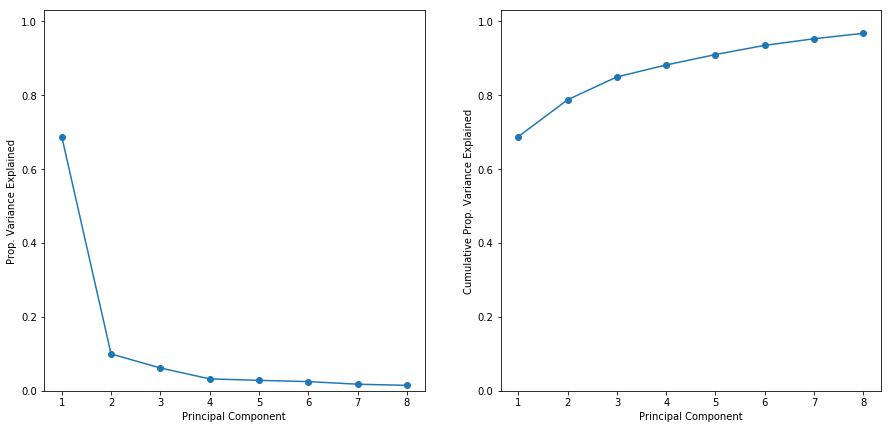

In [69]:
fig = plt.figure(figsize=(15,(7)))
ax = fig.add_subplot(121)
plt.scatter(np.arange(1,len(vectors)+1),pca.explained_variance_ratio_)
plt.plot(np.arange(1,len(vectors)+1),pca.explained_variance_ratio_)
plt.ylim(0,1.03)
plt.xlabel("Principal Component")
plt.ylabel("Prop. Variance Explained")
sumas = pca.explained_variance_ratio_.copy()
for i in range(1,len(sumas)):
    sumas[i] = pca.explained_variance_ratio_[0:i+1].sum()
ax = fig.add_subplot(122)
plt.scatter(np.arange(1,len(vectors)+1),sumas)
plt.plot(np.arange(1,len(vectors)+1),sumas)
plt.ylabel("Cumulative Prop. Variance Explained")
plt.xlabel("Principal Component")
plt.ylim(0,1.03)

In [70]:
rta = len(sumas[sumas<0.8])+1
print("El número de componentes principales necesarios para explicar al menos el 80 porciento de la varianza es:")
print(rta)

    

El número de componentes principales necesarios para explicar al menos el 80 porciento de la varianza es:
3


In [87]:
Y_t= pca.fit(Y_t).transform(Y_t)
vectors = pca.components_.copy()
A = np.zeros(Y_t.shape[0])
B = np.zeros(Y_t.shape[0])
for i in range(len(A)):
    A[i] = np.dot(Y_t[i,:],vectors[0,:])
    B[i] = np.dot(Y_t[i,:],-vectors[1,:])

Text(0,0.5,'Second Principal Component')

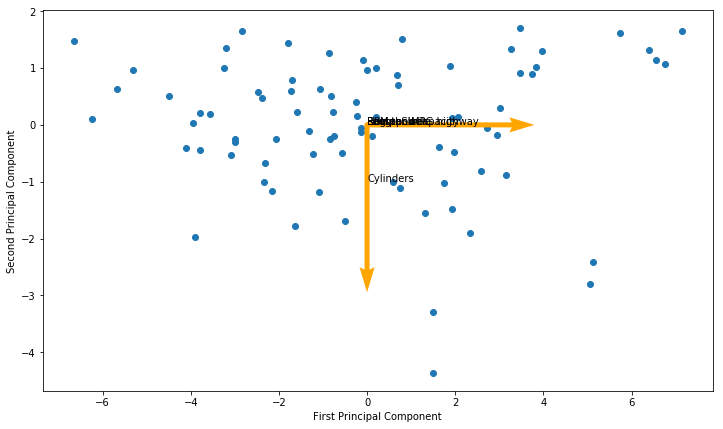

In [94]:
plt.figure(figsize=(12,(7)))
vectors = vectors[0:2]
origin = [0], [0] # origin point
plt.scatter(A,B)
plt.quiver(*origin, vectors[0,:], -vectors[1,:], color=['orange','orange','orange','orange'], scale=4)
#for name,xy in zip(names,zip(A, B)):
 #   plt.annotate(name, xy=xy, textcoords='data') # <--
for name,xy in zip(llaves,zip(vectors[0,:], -vectors[1,:])):
    plt.annotate(name, xy=xy, textcoords='data')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

In [77]:
len(A)

14

In [95]:
vectors.shape[0]

2

In [96]:
vectors

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00,  1.00000000e+00, -1.95156391e-18,
         4.64038530e-17, -5.20417043e-17,  2.51534904e-17,
         1.08420217e-17,  6.93889390e-18]])